In [1]:
import json, urllib
import plotly.graph_objects as go
import plotly
import pandas as pd
import numpy as np
import os
# plotly.offline.init_notebook_mode(connected=True)

In [73]:
df = pd.read_csv('../data/sankey_mappings.txt')
df_values = pd.DataFrame(data=np.unique(df[['source','target']].values.flatten()),columns=['names'])
df_values = df_values.reset_index()
df_values = df_values.rename(columns={'index':'unique_ix'})
df_values.index = df_values['names']
df_values.head()

,unique_ix,names
names,,
ACCESS,0,ACCESS
Acidity,1,Acidity
Animal Tagging,2,Animal Tagging
Bathymetry,3,Bathymetry
Biological vital rates,4,Biological vital rates


In [51]:
df['source_ix'] = df['source'].replace(df_values['unique_ix'])
df['target_ix'] = df['target'].replace(df_values['unique_ix'])
df.head()

,source,target,source_ix,target_ix
0,in kind - XXX,Bathymetry,62,3
1,in kind - XXX,Bottom character,62,5
2,HFR,Currents,19,14
3,Gliders,Currents,18,14
4,CA ROMS,Currents,6,14


In [70]:
phys_df = df[df['target'].isin(['Temperature','Salinity','Currents'])]
phys_df.head()
df_values = pd.DataFrame(data=np.unique(phys_df[['source','target']].values.flatten()),columns=['names'])
df_values = df_values.reset_index()
df_values = df_values.rename(columns={'index':'unique_ix'})
df_values.index = df_values['names']
df_values['colors'] = '.5'
phys_df['colors'] = '.5'
df_values.head()


<ipython-input-70-742ead68c26d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,unique_ix,names,colors
names,,,
ACCESS,0,ACCESS,.5
Animal Tagging,1,Animal Tagging,.5
CA ROMS,2,CA ROMS,.5
COAMPS,3,COAMPS,.5
Coastal Obs. Net. - Ocean weather & climate,4,Coastal Obs. Net. - Ocean weather & climate,.5


In [71]:
sources = phys_df['source_ix'].values
target  = phys_df['target_ix'].values
label = df_values['names'].values
value = np.ones(len(sources)) * 5
colors = phys_df['colors'].values
# ["#264653","#2A9D8F"],

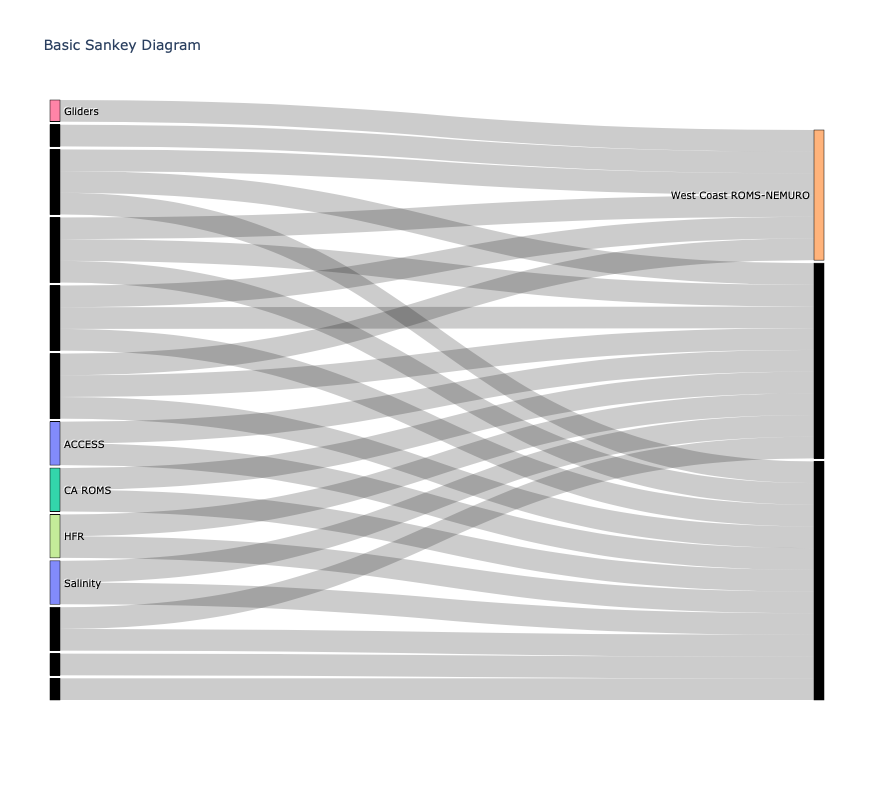

In [72]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    node = dict(
      pad = 3,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
        label=label,
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value
  ))])


fig.update_layout(
    title_text="Basic Sankey Diagram", 
    font_size=10,
    autosize=False,
    width=600,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

### Write out to HTML ###

In [18]:
fig.write_html("../output/html/sankey_v2.html")

In [19]:
def copy_file_to_webserver(FILE):
    """Copy images from to webserver where they can be viewed publically."""
    try:
        os.system('scp -i /etc/ssh/keys/pdaniel/scp_rsa {} skyrocket8.mbari.org:/var/www/html/data/strat-plots/ '.format(FILE))
    except:
        pass

copy_file_to_webserver("../output/html/sankey_v2.html")

### Save as png ###

In [20]:
fig.write_image("../output/static-images/sankey_v2.png")